# Bike Sharing 

## 1.Reading and Understanding Data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data 
bs = pd.read_csv("bikesharingdata.csv")
bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bs.shape

(730, 16)

In [4]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bs.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#dropping irrelevant cols
irrelevant_cols = ['casual','registered','instant','dteday']
bs = bs.drop(irrelevant_cols,axis=1)

## Mapping Categorical values

In [7]:
bs['season']= bs['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bs['mnth']= bs['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})
bs['weekday']= bs['weekday'].map({0:'tue', 1:'wed', 2:'thu', 3:'fri', 4:'sat', 5:'sun', 6:'mon'})
bs['weathersit']= bs['weathersit'].map({1:'clear', 2:'mist', 3:'light snow', 4:'heavy rain'})

In [8]:
bs.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [10]:
df = bs # copying data to other dataframe for multiple approach

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## EDA

### Univariate analysis

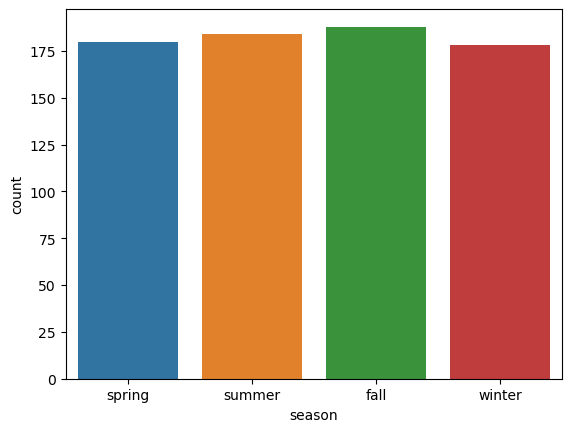

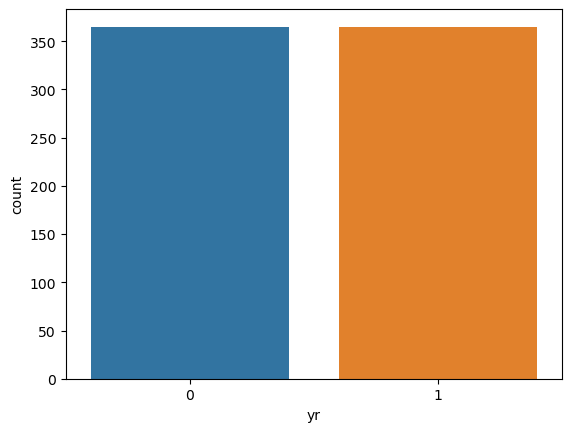

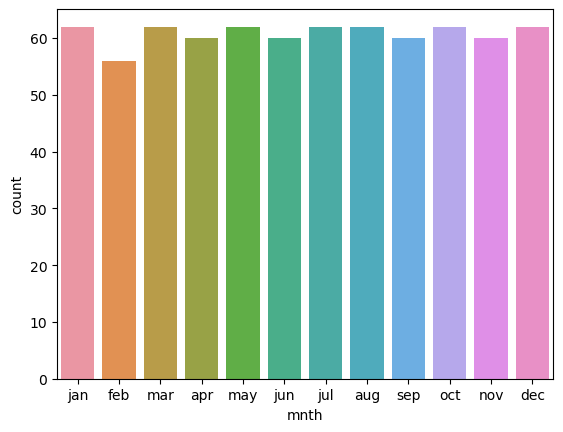

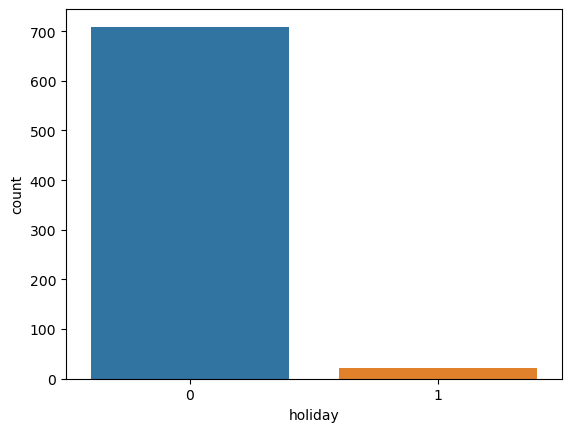

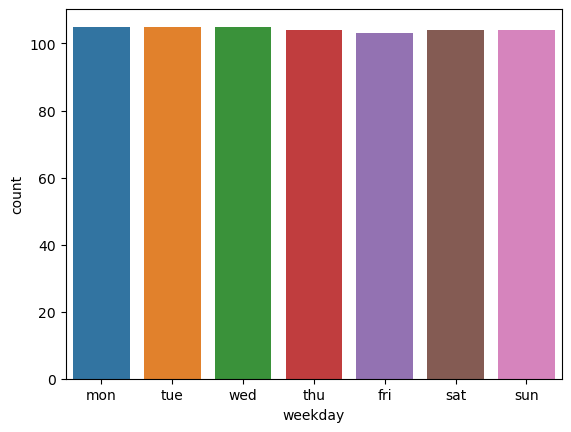

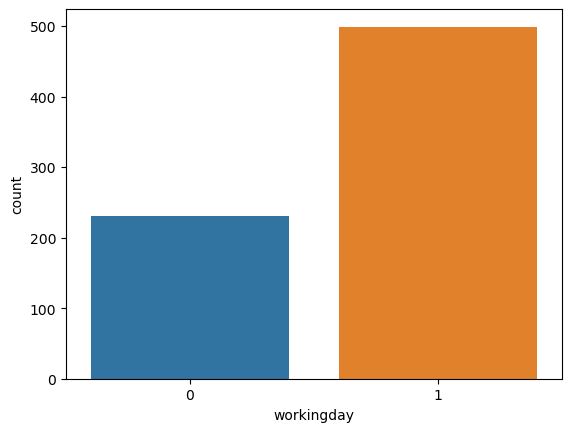

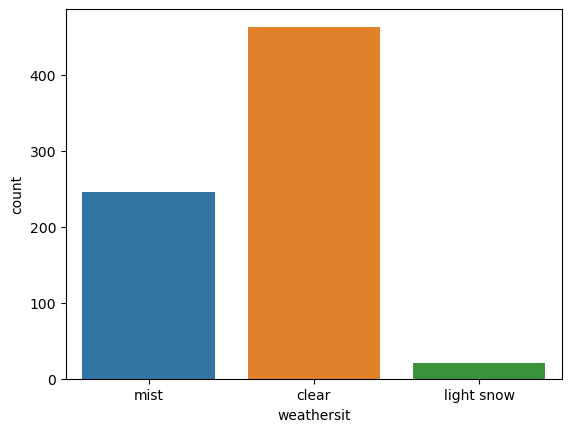

In [12]:
cat_cols =  ['season','yr','mnth','holiday','weekday','workingday','weathersit']
for i in cat_cols:
    sns.countplot(x=bs[i])
    plt.show()

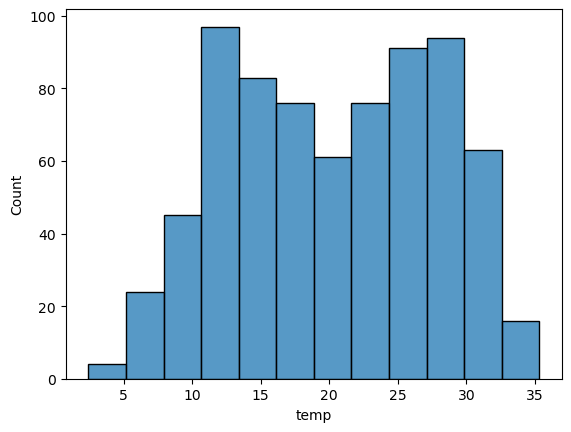

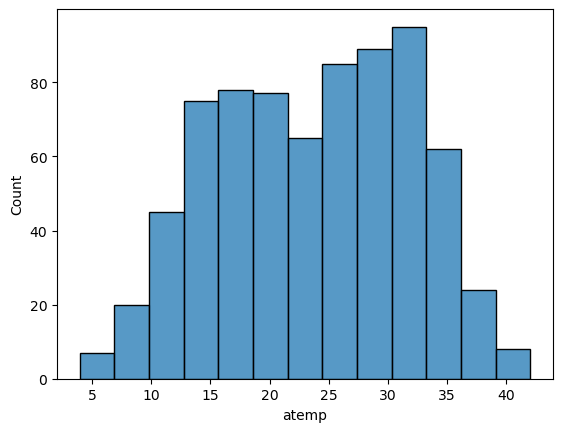

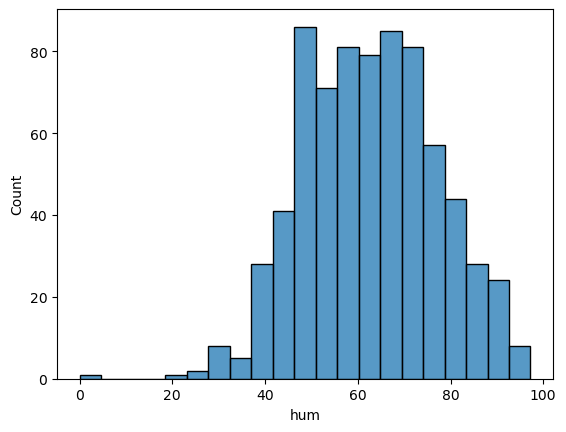

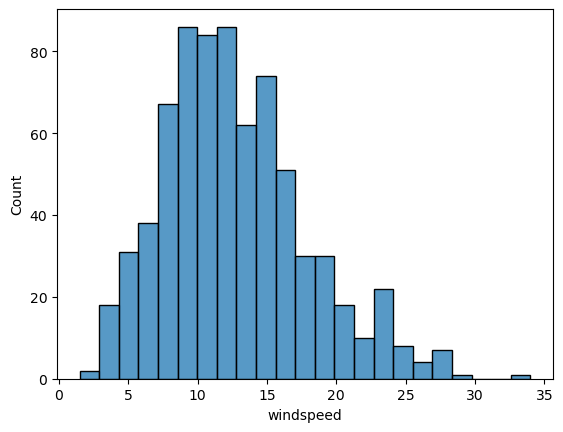

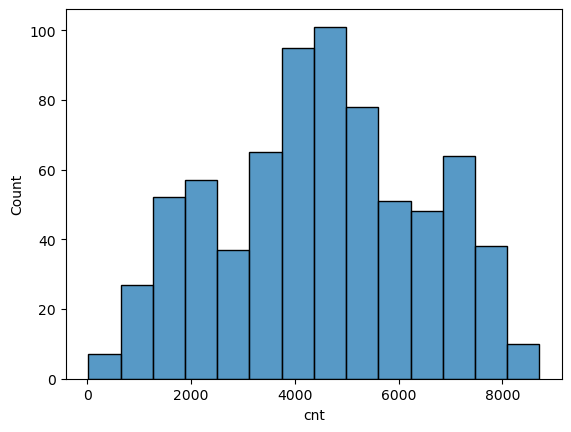

In [13]:
cont_cols = ['temp','atemp','hum','windspeed','cnt']
for i in cont_cols:
    sns.histplot(x=bs[i])
    plt.show()

### BiVariate analysis

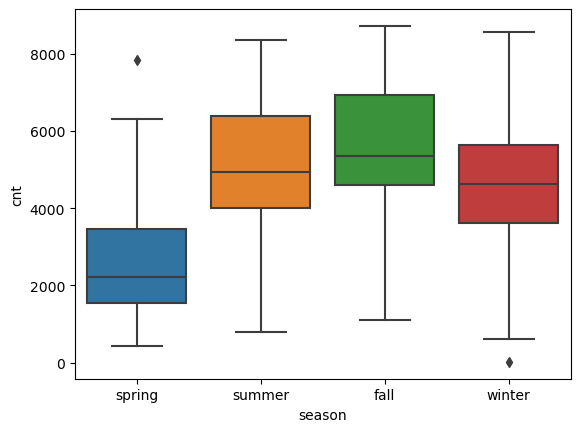

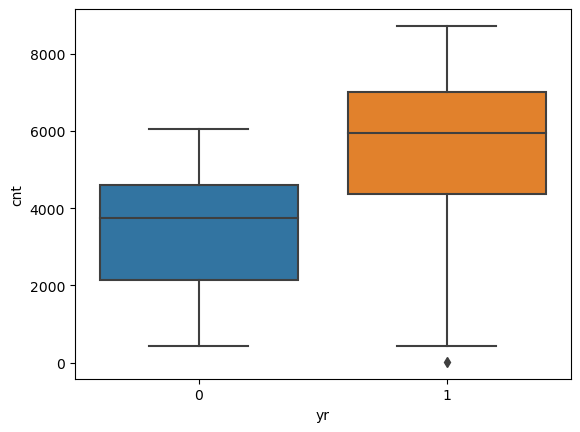

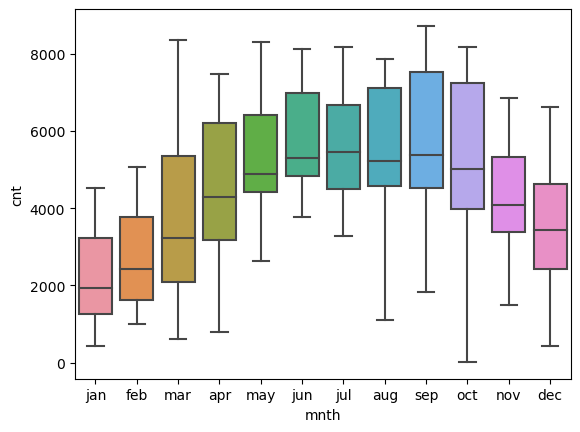

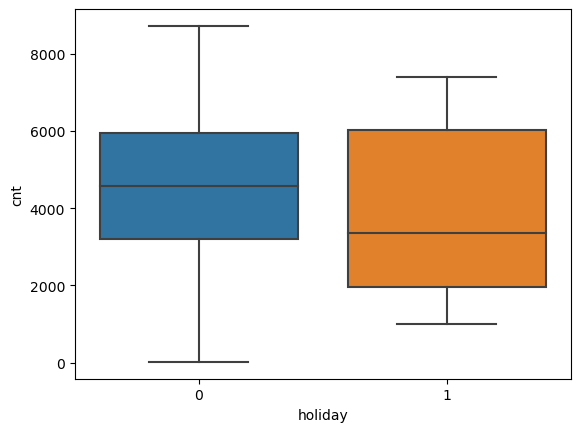

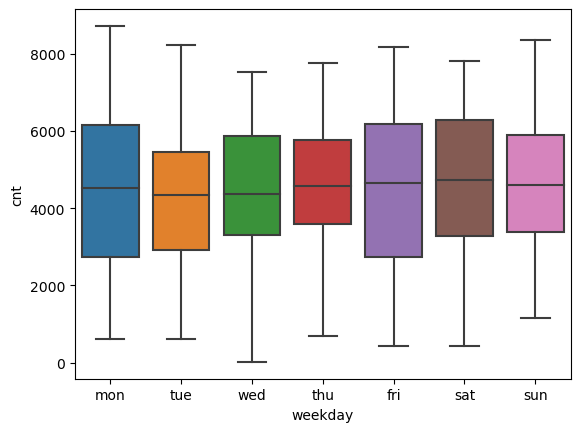

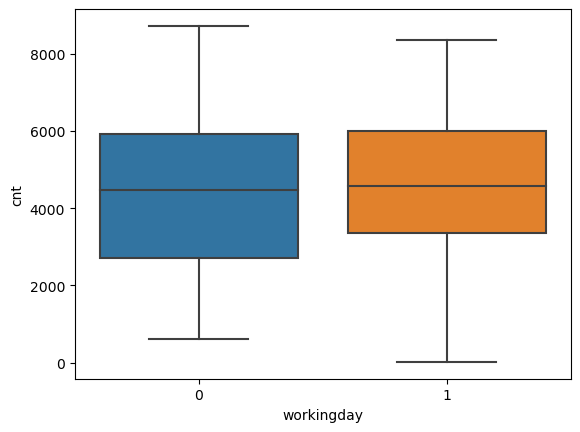

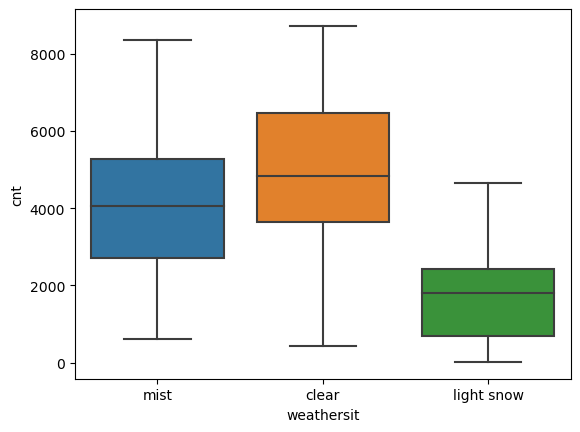

In [14]:
for i in cat_cols:
    sns.boxplot(data = bs, x=i,y='cnt' )
    plt.show()

### Multivariate analysis

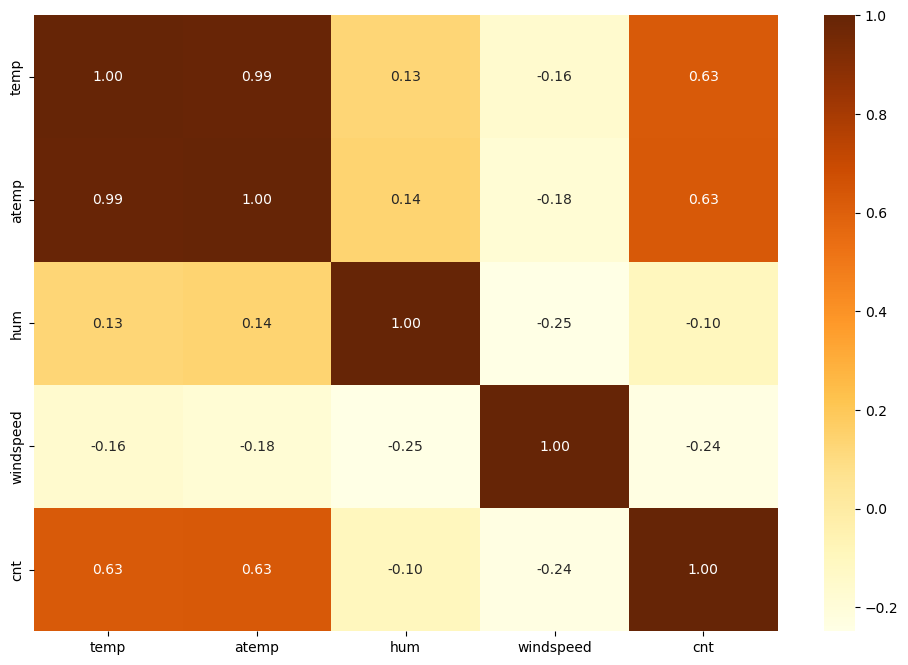

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(bs[cont_cols].corr(),annot=True,fmt='.2f',cmap="YlOrBr")
plt.show()

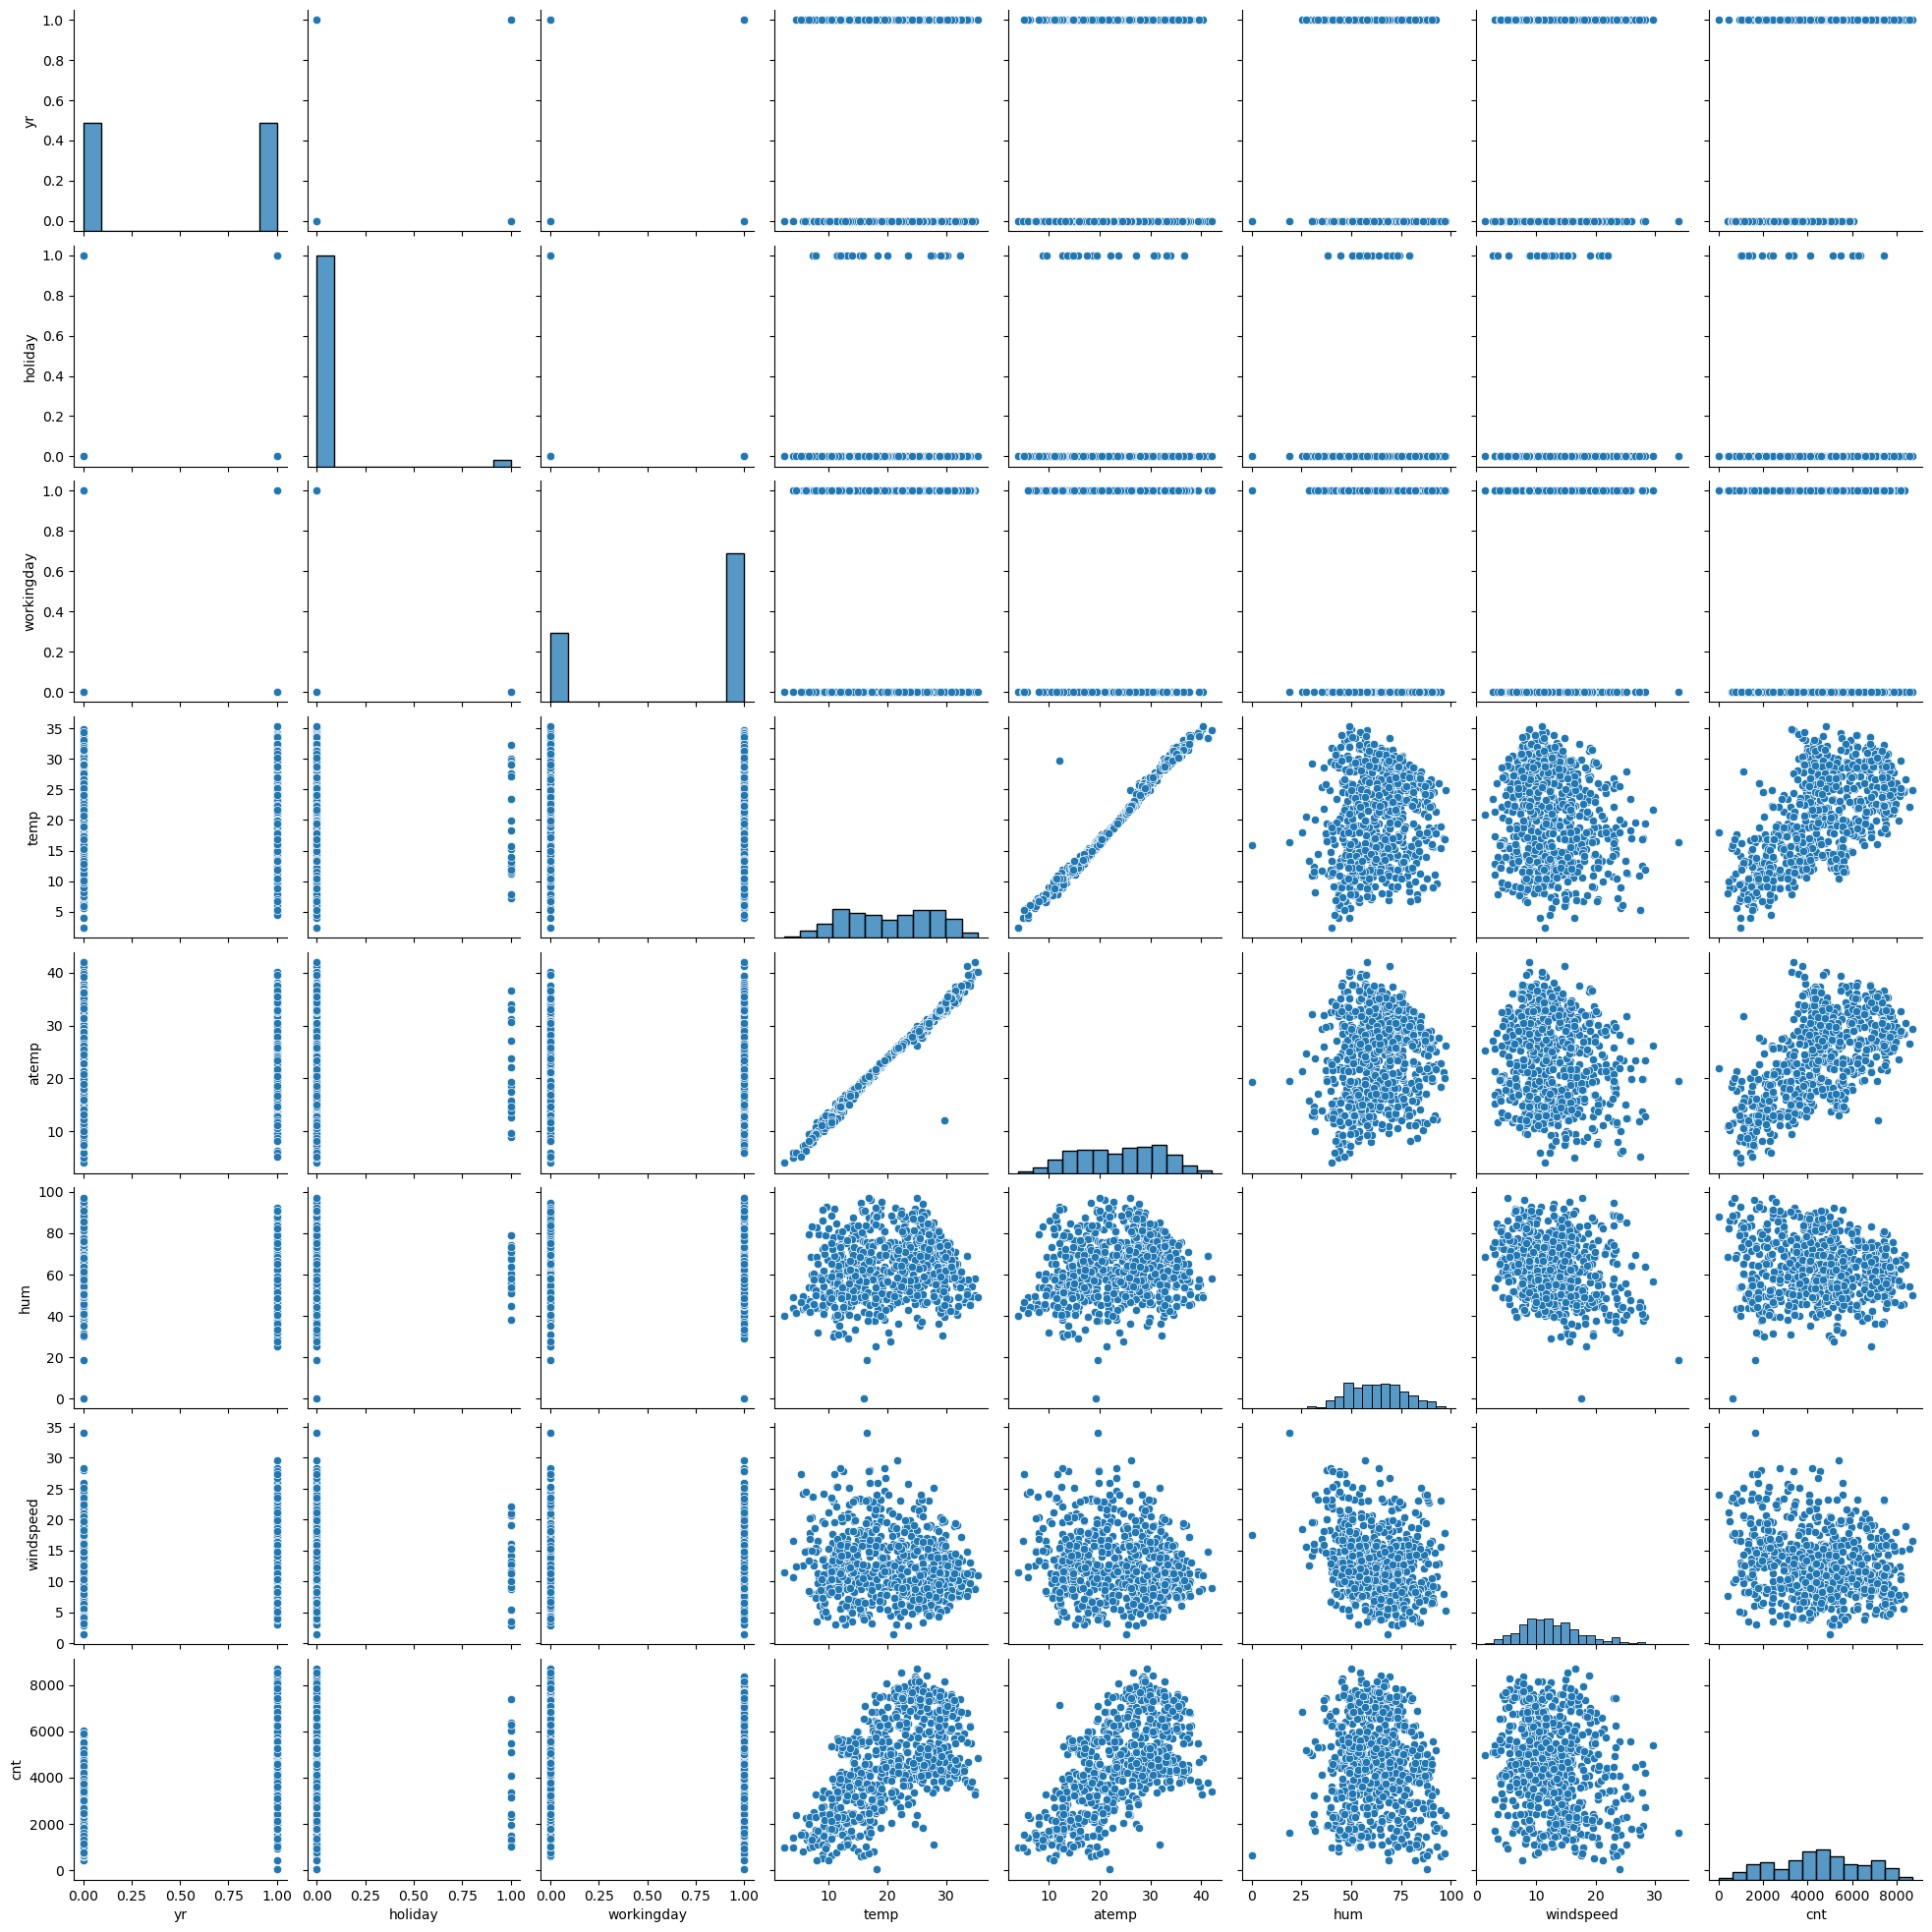

In [16]:
sns.pairplot(bs)
plt.show()

In [17]:
#we can drop atemp as it is highly correlated with temp 
bs.drop('atemp',axis=1,inplace=True)

## Creating dummies

In [18]:
season = pd.get_dummies(bs['season'],drop_first=True,dtype=int)

In [19]:
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [20]:
bs = pd.concat([bs,season],axis=1)

In [21]:
bs.drop(['season'], axis = 1, inplace = True)

In [22]:
weather = pd.get_dummies(bs['weathersit'],drop_first=True,dtype=int)
weekday = pd.get_dummies(bs['weekday'],drop_first=True,dtype=int)
month = pd.get_dummies(bs['mnth'],drop_first=True,dtype=int)

In [23]:
bs = pd.concat([bs,weather,weekday,month],axis=1)

In [24]:
bs.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,jan,0,mon,0,mist,14.110847,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,jan,0,tue,0,mist,14.902598,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,jan,0,thu,1,clear,8.200000,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [25]:
bs.drop(["weathersit","weekday","mnth"], axis = 1, inplace = True)

## Train and Test

In [26]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bs, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [28]:
cont = ['temp', 'hum','windspeed','cnt']
df_train[cont] = scaler.fit_transform(df_train[cont])

In [29]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


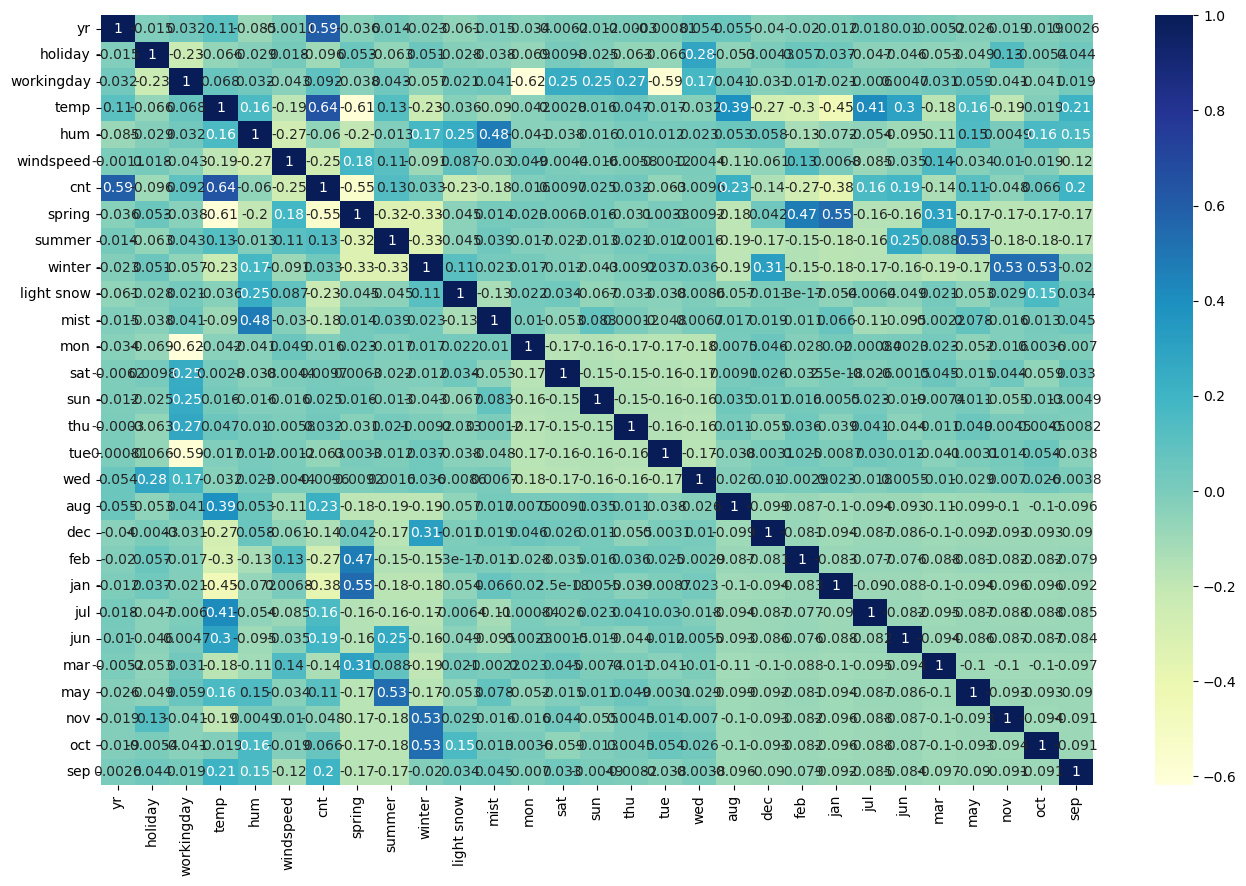

In [31]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing x and Y

In [32]:
y_train = df_train.pop('cnt')
X_train = df_train

### Building model

In [33]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [34]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('light snow', True, 1),
 ('mist', True, 1),
 ('mon', True, 1),
 ('sat', False, 3),
 ('sun', False, 3),
 ('thu', False, 3),
 ('tue', True, 1),
 ('wed', False, 3),
 ('aug', False, 3),
 ('dec', False, 2),
 ('feb', False, 3),
 ('jan', False, 2),
 ('jul', True, 1),
 ('jun', False, 3),
 ('mar', False, 3),
 ('may', False, 3),
 ('nov', False, 2),
 ('oct', False, 3),
 ('sep', True, 1)]

In [36]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'light snow', 'mist', 'mon', 'tue', 'jul', 'sep'],
      dtype='object')

In [37]:
X_train.columns[~rfe.support_]

Index(['summer', 'sat', 'sun', 'thu', 'wed', 'aug', 'dec', 'feb', 'jan', 'jun',
       'mar', 'may', 'nov', 'oct'],
      dtype='object')

### Stats model

In [38]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [39]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [40]:
lm = sm.OLS(y_train,X_train_rfe).fit() #linear Model

In [41]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          3.81e-190
Time:                        14:41:35   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2418      0.025      9.590      0.000       0.192       0.291
yr             0.2307      0.008     28.473      0.000       0.215       0.247
holiday       -0.0088      0.021     -0.411      0.681      -0.051       0.033
workingday     0.0945      0.009     10.206      0.000       0.076       0.113
temp           0.4788      0.031     15.671      0.000       0.419       0.539
hum           -0.1466      0.038     -3.898      0.000      -0.221      -0.073
windspeed     -0.1686      0.025     -6.622      0.000      -0.219      -0.119
spring        -0.1067      0.015     -7.194      0.000      -0.136      -0.078
winter         0.0579      0.012      4.712      0.000       0.034       0.082
light snow    -0.2513      0.026     -9.541      0.000      -0.303      -0.200
mist          -0.0594      0.011     -5.648      0.000      -0.080      -0.039
mon            0.1043      0.011      9.167      0.000       0.082       0.127
tue            0.0517      0.012      4.317      0.000       0.028       0.075
jul           -0.0779      0.017     -4.560      0.000      -0.111      -0.044
sep            0.0595      0.015      3.853      0.000       0.029       0.090
==============================================================================
Omnibus:                       61.396   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.940
Skew:                          -0.607   Prob(JB):                     3.07e-35
Kurtosis:                       5.450   Cond. No.                     1.04e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.36e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
11,mon,inf
12,tue,inf
4,temp,2.99
7,spring,2.55
5,hum,1.89
8,winter,1.78
10,mist,1.57
13,jul,1.30


### Rebuilding without "holiday"

In [43]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1) #dropping High p value >> dropping Hif VIF 

In [44]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() #linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          3.81e-190
Time:                        14:42:09   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2331      0.040      5.857      0.000       0.155       0.311
yr             0.2307      0.008     28.473      0.000       0.215       0.247
workingday     0.1033      0.026      4.026      0.000       0.053       0.154
temp           0.4788      0.031     15.671      0.000       0.419       0.539
hum           -0.1466      0.038     -3.898      0.000      -0.221      -0.073
windspeed     -0.1686      0.025     -6.622      0.000      -0.219      -0.119
spring        -0.1067      0.015     -7.194      0.000      -0.136      -0.078
winter         0.0579      0.012      4.712      0.000       0.034       0.082
light snow    -0.2513      0.026     -9.541      0.000      -0.303      -0.200
mist          -0.0594      0.011     -5.648      0.000      -0.080      -0.039
mon            0.1131      0.027      4.171      0.000       0.060       0.166
tue            0.0605      0.027      2.218      0.027       0.007       0.114
jul           -0.0779      0.017     -4.560      0.000      -0.111      -0.044
sep            0.0595      0.015      3.853      0.000       0.029       0.090
==============================================================================
Omnibus:                       61.396   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.940
Skew:                          -0.607   Prob(JB):                     3.07e-35
Kurtosis:                       5.450   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,99.67
2,workingday,9.07
10,mon,6.06
11,tue,5.74
3,temp,2.99
6,spring,2.55
4,hum,1.89
7,winter,1.78
9,mist,1.57
12,jul,1.30


### Rebuilding after dropping "const"

In [46]:
X_train_new = X_train_new.drop(["const"], axis = 1) 

In [47]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() #linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          3.81e-190
Time:                        14:42:37   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2331      0.040      5.857      0.000       0.155       0.311
yr             0.2307      0.008     28.473      0.000       0.215       0.247
workingday     0.1033      0.026      4.026      0.000       0.053       0.154
temp           0.4788      0.031     15.671      0.000       0.419       0.539
hum           -0.1466      0.038     -3.898      0.000      -0.221      -0.073
windspeed     -0.1686      0.025     -6.622      0.000      -0.219      -0.119
spring        -0.1067      0.015     -7.194      0.000      -0.136      -0.078
winter         0.0579      0.012      4.712      0.000       0.034       0.082
light snow    -0.2513      0.026     -9.541      0.000      -0.303      -0.200
mist          -0.0594      0.011     -5.648      0.000      -0.080      -0.039
mon            0.1131      0.027      4.171      0.000       0.060       0.166
tue            0.0605      0.027      2.218      0.027       0.007       0.114
jul           -0.0779      0.017     -4.560      0.000      -0.111      -0.044
sep            0.0595      0.015      3.853      0.000       0.029       0.090
==============================================================================
Omnibus:                       61.396   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.940
Skew:                          -0.607   Prob(JB):                     3.07e-35
Kurtosis:                       5.450   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.19
2,temp,17.24
1,workingday,16.92
9,mon,4.57
4,windspeed,4.52
10,tue,4.45
5,spring,2.79
8,mist,2.27
6,winter,2.15
0,yr,2.08


### Rebuilding after dropping "hum"

In [49]:
X_train_new = X_train_new.drop(["hum"], axis = 1) ## high VIF value

In [50]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() #linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.3
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          4.38e-188
Time:                        14:42:50   Log-Likelihood:                 503.75
No. Observations:                 510   AIC:                            -981.5
Df Residuals:                     497   BIC:                            -926.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1536      0.035      4.432      0.000       0.086       0.222
yr             0.2342      0.008     28.677      0.000       0.218       0.250
workingday     0.1039      0.026      3.994      0.000       0.053       0.155
temp           0.4509      0.030     14.968      0.000       0.392       0.510
windspeed     -0.1407      0.025     -5.677      0.000      -0.189      -0.092
spring        -0.1103      0.015     -7.348      0.000      -0.140      -0.081
winter         0.0491      0.012      4.007      0.000       0.025       0.073
light snow    -0.2917      0.025    -11.880      0.000      -0.340      -0.243
mist          -0.0831      0.009     -9.535      0.000      -0.100      -0.066
mon            0.1154      0.027      4.197      0.000       0.061       0.169
tue            0.0582      0.028      2.107      0.036       0.004       0.113
jul           -0.0708      0.017     -4.113      0.000      -0.105      -0.037
sep            0.0563      0.016      3.602      0.000       0.026       0.087
==============================================================================
Omnibus:                       64.780   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.063
Skew:                          -0.646   Prob(JB):                     1.44e-36
Kurtosis:                       5.470   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,13.12
2,temp,12.38
3,windspeed,4.48
8,mon,3.76
9,tue,3.53
4,spring,2.44
0,yr,2.07
5,winter,1.78
7,mist,1.57
10,jul,1.37


### Rebuilding after dropping "workingday"

In [52]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [53]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() #linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.7
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          7.06e-186
Time:                        14:43:04   Log-Likelihood:                 495.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     498   BIC:                            -916.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2546      0.024     10.580      0.000       0.207       0.302
yr             0.2348      0.008     28.321      0.000       0.218       0.251
temp           0.4519      0.031     14.782      0.000       0.392       0.512
windspeed     -0.1429      0.025     -5.680      0.000      -0.192      -0.093
spring        -0.1133      0.015     -7.445      0.000      -0.143      -0.083
winter         0.0458      0.012      3.696      0.000       0.021       0.070
light snow    -0.2870      0.025    -11.530      0.000      -0.336      -0.238
mist          -0.0811      0.009     -9.192      0.000      -0.098      -0.064
mon            0.0154      0.012      1.336      0.182      -0.007       0.038
tue           -0.0416      0.012     -3.484      0.001      -0.065      -0.018
jul           -0.0702      0.017     -4.016      0.000      -0.105      -0.036
sep            0.0525      0.016      3.315      0.001       0.021       0.084
==============================================================================
Omnibus:                       78.650   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.017
Skew:                          -0.758   Prob(JB):                     5.54e-47
Kurtosis:                       5.779   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.72
2,windspeed,4.04
0,yr,2.06
3,spring,1.66
6,mist,1.51
4,winter,1.41
9,jul,1.35
7,mon,1.22
8,tue,1.20
10,sep,1.20


### Rebuilding after dropping "mon"

In [55]:
X_train_new = X_train_new.drop(["mon"], axis = 1)

In [56]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() #linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.8
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          1.06e-186
Time:                        14:43:25   Log-Likelihood:                 494.79
No. Observations:                 510   AIC:                            -967.6
Df Residuals:                     499   BIC:                            -921.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2574      0.024     10.731      0.000       0.210       0.305
yr             0.2344      0.008     28.271      0.000       0.218       0.251
temp           0.4509      0.031     14.743      0.000       0.391       0.511
windspeed     -0.1414      0.025     -5.621      0.000      -0.191      -0.092
spring        -0.1133      0.015     -7.436      0.000      -0.143      -0.083
winter         0.0461      0.012      3.717      0.000       0.022       0.071
light snow    -0.2868      0.025    -11.514      0.000      -0.336      -0.238
mist          -0.0811      0.009     -9.181      0.000      -0.098      -0.064
tue           -0.0445      0.012     -3.776      0.000      -0.068      -0.021
jul           -0.0696      0.017     -3.978      0.000      -0.104      -0.035
sep            0.0526      0.016      3.316      0.001       0.021       0.084
==============================================================================
Omnibus:                       73.763   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.239
Skew:                          -0.697   Prob(JB):                     3.67e-46
Kurtosis:                       5.811   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.67
2,windspeed,4.00
0,yr,2.06
3,spring,1.65
6,mist,1.51
4,winter,1.40
8,jul,1.35
9,sep,1.20
7,tue,1.17
5,light snow,1.08


## Residual analysis

In [58]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

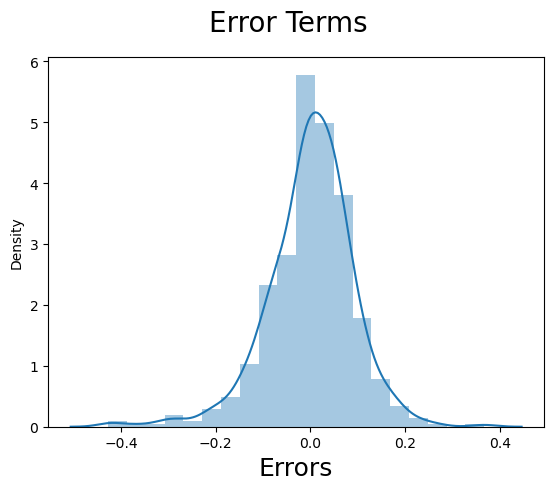

In [59]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

## Making predictions using final model


In [60]:
cont = ['temp', 'hum','windspeed','cnt']
df_test[cont] = scaler.transform(df_test[cont])

In [61]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
y_test = df_test.pop('cnt')
X_test = df_test

In [63]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [64]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

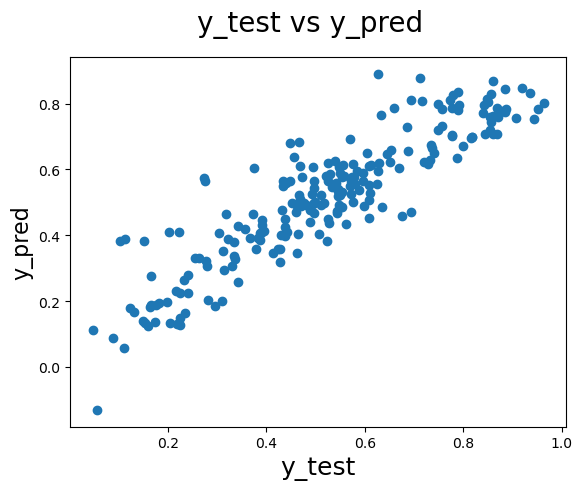

In [65]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [66]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_pred)

0.8086992490628288

R2 score = 0.8087

cnt = 0.257 + 0.234*yr + 0.451*temp	-0.141*windspeed - 0.113*spring + 0.047*winter - 0.286*light snow - 0.081*mist -0.045*tue -0.07*jul + 0.053*sep
